## **Project Objective:**

The goal of this project is to perform **sentiment analysis** and other **Natural Language Processing (NLP)** techniques on comments from relevant subreddits to understand how people perceive the **future of artificial intelligence**.  
The aim is to gather insights into people's opinions about the future.

Currently, the project is in its **initial phase**, and my goal is to **increase the sample size**, utilize more **complex algorithms**, and conduct additional analyses to reach more **reliable conclusions** in the future.  
The results of the analysis performed so far are shared within this notebook.


In [1]:
import pandas as pd 

df = pd.read_csv("reddit_comments_clean.csv")
df

,Comment,User,Date,Post Name,Score
0,Most if not all white-collar jobs. Depending o...,eddnedd,2024-12-10 22:38:20,Will AI eventually replace human jobs?,3
1,Humans collaborating with AI will replace mult...,InternationalMatch13,2024-12-10 22:42:36,Will AI eventually replace human jobs?,3
2,It is already disrupted helpdesk jobs. Coders/...,No-Garden8616,2024-12-10 22:28:27,Will AI eventually replace human jobs?,5
3,One approach to predicting the future: look at...,Chiefs24x7,2024-12-10 22:43:04,Will AI eventually replace human jobs?,2
4,Some,Straight-Message7937,2024-12-10 22:34:52,Will AI eventually replace human jobs?,1
...,...,...,...,...,...
1347,"A lot of AI experts think it’s possible, like ...",Unknown,2024-05-20 03:51:26,AI won't replace software engineers,3
1348,People should definitely try to minimize the n...,t3hlazy1,2024-05-19 19:31:18,AI won't replace software engineers,3
1349,Please do the needful.,MoronEngineer,2024-09-19 10:02:12,Has anyone actually heard of AI replacing thei...,16
1350,"No argument on musk, but AI is still in its in...",Middle_Loan3715,2023-11-04 00:07:13,Do you think that AI could eventually replace ...,3


## Pre-Processing of Text Data

In [2]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.data.path.append('/Users/enesyesil/Desktop/AGROVINICA/Python/First analysis files/nltk_data')
stop_words = set(stopwords.words('english'))

# Cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize words
    words = word_tokenize(text)
    # Remove numbers (optional)
    words = [word for word in words if not word.isdigit()]
    # Join words and return
    return ' '.join(words)

# Clean the "Comment" column
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Display the results
df


,Comment,User,Date,Post Name,Score,Cleaned_Comment
0,Most if not all white-collar jobs. Depending o...,eddnedd,2024-12-10 22:38:20,Will AI eventually replace human jobs?,3,most if not all whitecollar jobs depending on ...
1,Humans collaborating with AI will replace mult...,InternationalMatch13,2024-12-10 22:42:36,Will AI eventually replace human jobs?,3,humans collaborating with ai will replace mult...
2,It is already disrupted helpdesk jobs. Coders/...,No-Garden8616,2024-12-10 22:28:27,Will AI eventually replace human jobs?,5,it is already disrupted helpdesk jobs coderspr...
3,One approach to predicting the future: look at...,Chiefs24x7,2024-12-10 22:43:04,Will AI eventually replace human jobs?,2,one approach to predicting the future look at ...
4,Some,Straight-Message7937,2024-12-10 22:34:52,Will AI eventually replace human jobs?,1,some
...,...,...,...,...,...,...
1347,"A lot of AI experts think it’s possible, like ...",Unknown,2024-05-20 03:51:26,AI won't replace software engineers,3,a lot of ai experts think it ’ s possible like...
1348,People should definitely try to minimize the n...,t3hlazy1,2024-05-19 19:31:18,AI won't replace software engineers,3,people should definitely try to minimize the n...
1349,Please do the needful.,MoronEngineer,2024-09-19 10:02:12,Has anyone actually heard of AI replacing thei...,16,please do the needful
1350,"No argument on musk, but AI is still in its in...",Middle_Loan3715,2023-11-04 00:07:13,Do you think that AI could eventually replace ...,3,no argument on musk but ai is still in its inf...


# TF-IDF Score Calculation

This script calculates the **TF-IDF (Term Frequency-Inverse Document Frequency) score** for each comment in the dataset.  
TF-IDF is a metric that evaluates the importance of words in a document relative to a collection of documents (corpus).  

### **Purpose of this script:**
- Convert text data into numerical values using the TF-IDF approach.
- Identify which comments contain more unique and important words.
- Provide an **average TF-IDF score** for each comment, indicating how distinctive its words are compared to other comments.

### **How to interpret TF-IDF scores?**
- **Higher TF-IDF Score** → The comment contains words that are **less common** in the dataset, making it more unique.
- **Lower TF-IDF Score** → The comment consists of words that are **frequently used** across multiple comments, making it more generic.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to calculate TF-IDF scores
def compute_tfidf_scores(df, text_column):
    # Create a TfidfVectorizer object
    vectorizer = TfidfVectorizer()
    # Generate the TF-IDF matrix from the comments
    tfidf_matrix = vectorizer.fit_transform(df[text_column])
    # Calculate the average TF-IDF scores for each comment
    avg_tfidf_scores = tfidf_matrix.mean(axis=1).A1  # Convert to numpy array using `A1`
    return avg_tfidf_scores

# Compute TF-IDF scores based on the "Cleaned_Comment" column
df['TF-IDF_Score'] = compute_tfidf_scores(df, 'Cleaned_Comment')

# Display the results
df

,Comment,User,Date,Post Name,Score,Cleaned_Comment,TF-IDF_Score
0,Most if not all white-collar jobs. Depending o...,eddnedd,2024-12-10 22:38:20,Will AI eventually replace human jobs?,3,most if not all whitecollar jobs depending on ...,0.001370
1,Humans collaborating with AI will replace mult...,InternationalMatch13,2024-12-10 22:42:36,Will AI eventually replace human jobs?,3,humans collaborating with ai will replace mult...,0.000530
2,It is already disrupted helpdesk jobs. Coders/...,No-Garden8616,2024-12-10 22:28:27,Will AI eventually replace human jobs?,5,it is already disrupted helpdesk jobs coderspr...,0.000473
3,One approach to predicting the future: look at...,Chiefs24x7,2024-12-10 22:43:04,Will AI eventually replace human jobs?,2,one approach to predicting the future look at ...,0.001445
4,Some,Straight-Message7937,2024-12-10 22:34:52,Will AI eventually replace human jobs?,1,some,0.000160
...,...,...,...,...,...,...,...
1347,"A lot of AI experts think it’s possible, like ...",Unknown,2024-05-20 03:51:26,AI won't replace software engineers,3,a lot of ai experts think it ’ s possible like...,0.000724
1348,People should definitely try to minimize the n...,t3hlazy1,2024-05-19 19:31:18,AI won't replace software engineers,3,people should definitely try to minimize the n...,0.001075
1349,Please do the needful.,MoronEngineer,2024-09-19 10:02:12,Has anyone actually heard of AI replacing thei...,16,please do the needful,0.000281
1350,"No argument on musk, but AI is still in its in...",Middle_Loan3715,2023-11-04 00:07:13,Do you think that AI could eventually replace ...,3,no argument on musk but ai is still in its inf...,0.001275


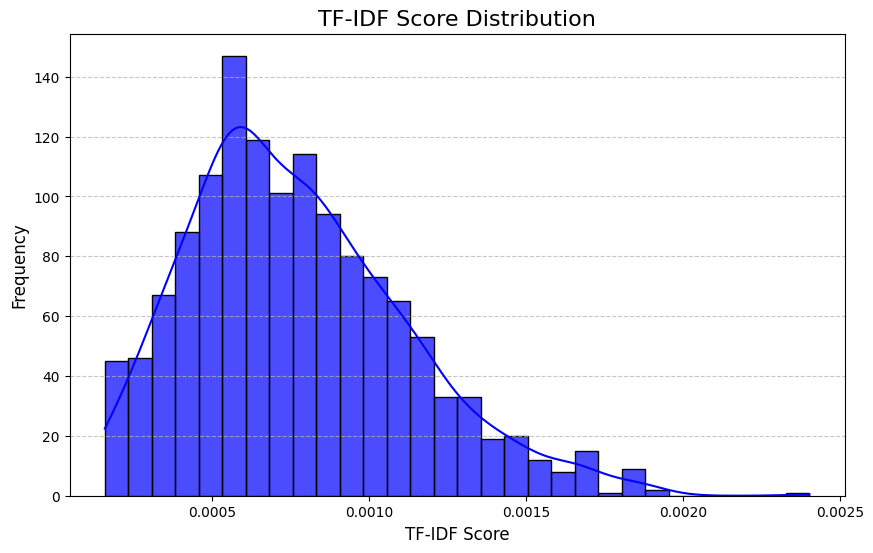

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF Score Distribution
def plot_tfidf_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=30, kde=True, color='blue', alpha=0.7)
    plt.title('TF-IDF Score Distribution', fontsize=16)
    plt.xlabel('TF-IDF Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Histogram of TF-IDF scores
plot_tfidf_distribution(df, 'TF-IDF_Score')

# BERT-Based Text Complexity Measurement

This script calculates a **complexity score** for each comment using **BERT (Bidirectional Encoder Representations from Transformers)**.  
The complexity is measured by computing the **norm** of the [CLS] token embedding, which represents the entire sentence's contextual meaning.

### **Purpose of this script:**
- Utilize **BERT embeddings** to assess the richness and depth of each comment.
- Measure **sentence complexity** based on the **magnitude of the embedding vector**.
- Provide a **BERT Complexity Score**, where higher values indicate more complex sentences.

### **How to interpret BERT Complexity Scores?**
- **Higher Complexity Score** → The sentence contains richer contextual information, diverse vocabulary, or complex structure.
- **Lower Complexity Score** → The sentence is simpler, with fewer unique or contextually rich words.

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to compute complexity using BERT embeddings' norm
def compute_bert_complexity(texts):
    complexities = []
    for text in texts:
        # Tokenize the text and convert it to a tensor
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():  # Run the model in inference mode
            outputs = model(**inputs)
        # Extract the CLS token embedding (usually found at position [0, 0, :])
        cls_embedding = outputs.last_hidden_state[:, 0, :]
        # Compute the norm of the CLS embedding (used as a complexity measure)
        norm = torch.norm(cls_embedding).item()
        complexities.append(norm)
    return complexities

# Sample DataFrame (using the previous 'Cleaned_Comment' column)
texts = df['Cleaned_Comment'].tolist()

# Compute complexity scores
df['BERT_Complexity'] = compute_bert_complexity(texts)

# Display the results
df[['Cleaned_Comment', 'BERT_Complexity']]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that 

,Cleaned_Comment,BERT_Complexity
0,most if not all whitecollar jobs depending on ...,14.667830
1,humans collaborating with ai will replace mult...,13.430852
2,it is already disrupted helpdesk jobs coderspr...,14.249813
3,one approach to predicting the future look at ...,15.238524
4,some,14.349871
...,...,...
1347,a lot of ai experts think it ’ s possible like...,13.335341
1348,people should definitely try to minimize the n...,13.594100
1349,please do the needful,14.362656
1350,no argument on musk but ai is still in its inf...,14.953513


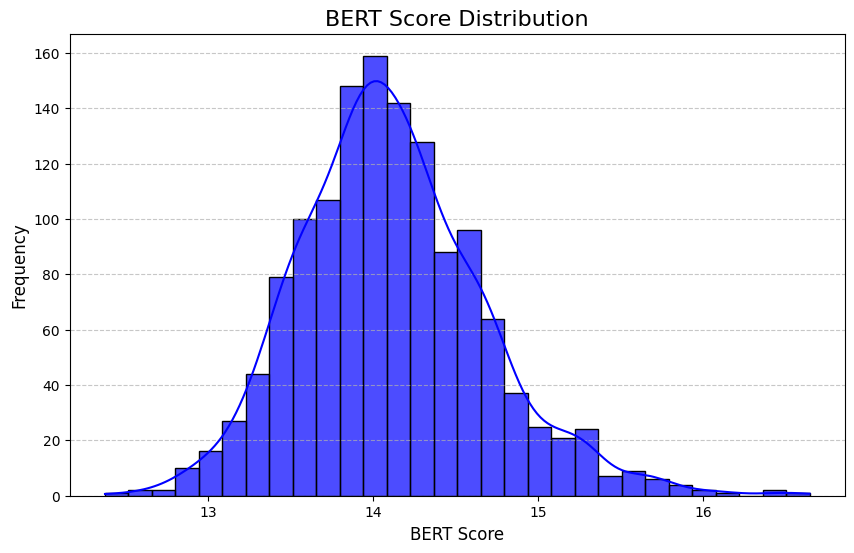

In [ ]:
# TF-IDF Score Distribution
def plot_tfidf_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=30, kde=True, color='blue', alpha=0.7)
    plt.title('BERT Score Distribution', fontsize=16)
    plt.xlabel('BERT Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Histogram of BERT Complexity Scores
plot_tfidf_distribution(df, 'BERT_Complexity')

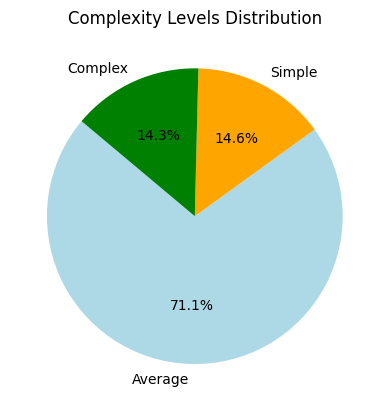

In [12]:
# Splitting the data into 3 complexity levels
def classify_complexity(score, mean, std):
    if score < (mean - std):
        return "Simple"
    elif score > (mean + std):
        return "Complex"
    else:
        return "Average"

mean = df['BERT_Complexity'].mean()
std = df['BERT_Complexity'].std()

df['Complexity_Level'] = df['BERT_Complexity'].apply(lambda x: classify_complexity(x, mean, std))

# Visualize the distribution of complexity levels
import matplotlib.pyplot as plt

df['Complexity_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'green'])
plt.title("Complexity Levels Distribution")
plt.ylabel("")  # Y eksenini kaldır
plt.show()

# Word Cloud

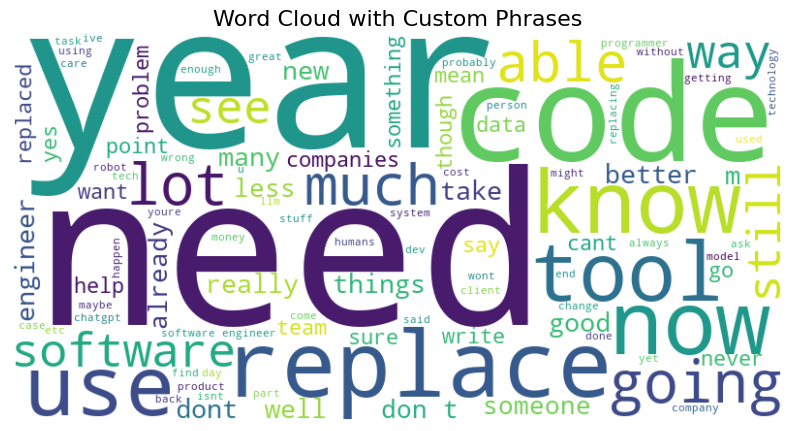

In [17]:
from wordcloud import WordCloud, STOPWORDS

# Words and phrases to exclude
exclude_words = {"ai", ".", "one", "job", "im", "even", "people", "thats", "think", "make", "s", "time", "work", "human", "actually", "thing", "jobs", "will"}  # Words to exclude
stopwords = STOPWORDS.union(exclude_words)

# Define custom word phrases
custom_phrases = [("will", "replace"), ("wont", "replace")]

# Merge all comments and combine word phrases
def preprocess_text(text, phrases):
    for phrase in phrases:
        joined_phrase = "_".join(phrase)
        text = text.replace(" ".join(phrase), joined_phrase)  # Merge the word phrase
    return text

# Process all comments and convert them into a single string
all_text = " ".join(
    preprocess_text(comment, custom_phrases) for comment in df['Cleaned_Comment'].astype(str).tolist()
)

# Create WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=stopwords,
    max_words=100,
).generate(all_text)

# Visualize the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud with Custom Phrases", fontsize=16)
plt.show()


## Sentiment Analysis

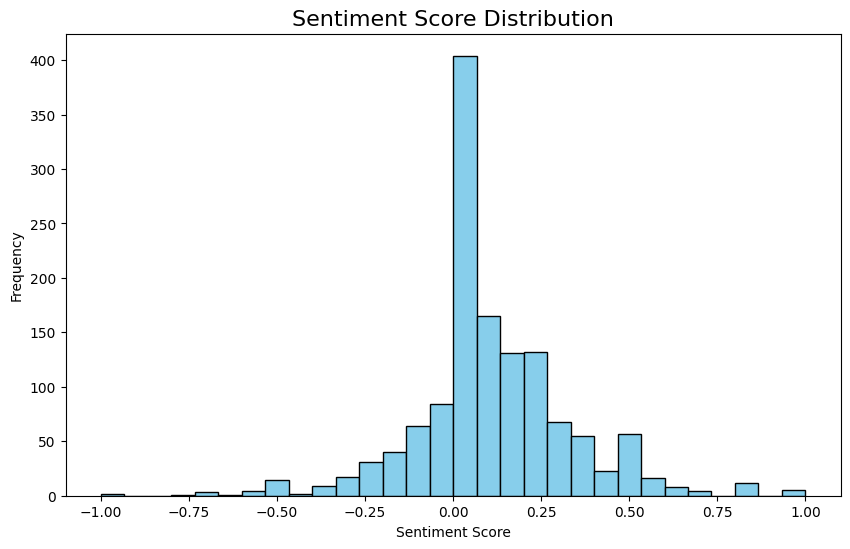

In [12]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.polarity  # Return the polarity score

# Calculate Polarity Scores
df['TextBlob_Sentiment'] = df['Cleaned_Comment'].apply(get_sentiment)

# Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['TextBlob_Sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title("Sentiment Score Distribution", fontsize=16)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

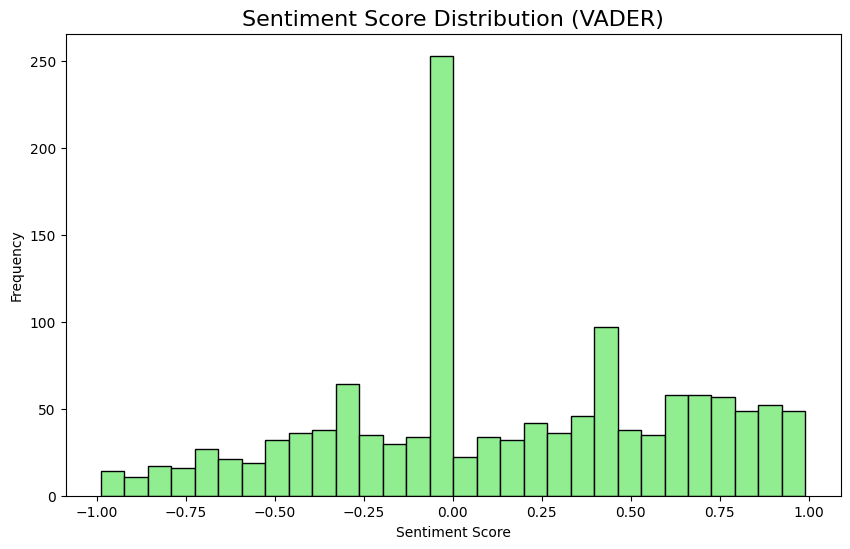

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Sentiment Analysis Function
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # Compound skoru döndür

# Calculate VADER Sentiment Scores
df['Vader_Sentiment'] = df['Cleaned_Comment'].apply(get_vader_sentiment)

# Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['Vader_Sentiment'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Sentiment Score Distribution (VADER)", fontsize=16)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

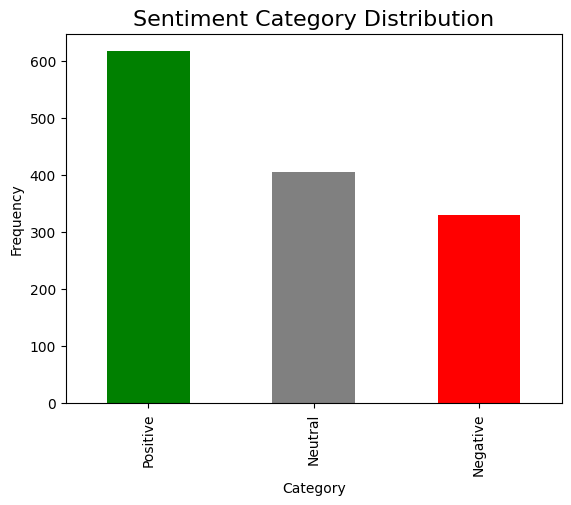

In [10]:
# Categorizing scores
def classify_sentiment(score):
    if score > 0.2:  # Lower threshold for positive sentiment
        return "Positive"
    elif score < -0.2:  # Lower threshold for negative sentiment
        return "Negative"
    else:  # Expanded neutral range
        return "Neutral"

df['Vader_Category'] = df['Vader_Sentiment'].apply(classify_sentiment)

# Visualizing the distribution of categories
df['Vader_Category'].value_counts().plot(kind='bar', color=['green', 'grey', 'red'])
plt.title("Sentiment Category Distribution", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Summary Stats of BERT Complexity and Sentiment Category
summary_stats = df.groupby('Vader_Category')['BERT_Complexity'].describe()
print(summary_stats)

                count       mean       std        min        25%        50%  \
Vader_Category                                                                
Negative        330.0  14.115022  0.567543  12.819259  13.769196  14.086735   
Neutral         405.0  14.019007  0.499345  12.585438  13.696702  13.999215   
Positive        617.0  14.172493  0.595983  12.375630  13.748465  14.108103   

                      75%        max  
Vader_Category                        
Negative        14.408267  16.645555  
Neutral         14.300958  16.139650  
Positive        14.569719  16.066137  


### **Interpretation of the Results:**

In the sentiment analysis, the comments classified as **Positive** have a higher average complexity score in the **BERT Complexity** algorithm compared to the **Negative** and **Neutral** categories.  
This suggests that individuals with a **positive outlook on AI's future impact** may possess a deeper understanding of the field.

Additionally, it is important to note that the number of comments in the **Positive** category is **significantly higher** compared to the other categories.

However, it is important to note that this project is still in its early stages, and the sample size needs to be increased for more reliable insights.  
Moreover, more **complex machine learning-based algorithms** for sentiment analysis should be utilized, as they are capable of providing more **context-based** results, which would lead to more **accurate and trustworthy conclusions**.
